In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import geopy
import geocoder
from geopy.geocoders import Nominatim
from datetime import datetime as dt
from datetime import date
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('final.csv',index_col = 0)
df['Hour'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H')).astype('int64')
df['Month'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%m')).astype('int64')
df['Date'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%d-%m-%Y'))
df['Day'] = df['Date'].apply(lambda x : list(map(int,x.split('-')))).apply(lambda x : date(x[2],x[1],x[0]).weekday())
df['Time'] = pd.to_datetime(df['Time'])
df = df.drop('Coordinates',axis = 1)

In [3]:
cities = list(set(list(df.City)))
len(cities)

119

In [4]:
locator = Nominatim(user_agent="red",timeout = 100)

coord = {}
for i,city in enumerate(cities):
    lc = locator.geocode(city)
    try:
        print(str(i+1)+'.'+ city + ' SUCCESS!')
        coord[city] = [lc.latitude,lc.longitude]
    except AttributeError:
        print(str(i+1)+'.'+city + ' DATA not available')

print(len(coord))   
coord

1.Navi Mumbai SUCCESS!
2.Patna SUCCESS!
3.Kozhikode SUCCESS!
4.Vapi SUCCESS!
5.Faridabad SUCCESS!
6.Vijayapura SUCCESS!
7.Ratlam SUCCESS!
8.Ambala SUCCESS!
9.Rajamahendravaram SUCCESS!
10.Panchkula SUCCESS!
11.Ghaziabad SUCCESS!
12.Sagar SUCCESS!
13.Kanpur SUCCESS!
14.Guwahati SUCCESS!
15.Amaravati SUCCESS!
16.Gurugram SUCCESS!
17.Mumbai SUCCESS!
18.Narnaul SUCCESS!
19.Jodhpur SUCCESS!
20.Thane SUCCESS!
21.Varanasi SUCCESS!
22.Maihar SUCCESS!
23.Yamunanagar SUCCESS!
24.Fatehabad SUCCESS!
25.Patiala SUCCESS!
26.Hisar SUCCESS!
27.Satna SUCCESS!
28.Nandesari SUCCESS!
29.Delhi SUCCESS!
30.Shillong SUCCESS!
31.Moradabad SUCCESS!
32.Kalaburgi SUCCESS!
33.Hapur SUCCESS!
34.Siliguri SUCCESS!
35.Coimbatore SUCCESS!
36.Nagpur SUCCESS!
37.Bengaluru SUCCESS!
38.Thrissur SUCCESS!
39.Udaipur SUCCESS!
40.Solapur SUCCESS!
41.Dewas SUCCESS!
42.Bahadurgarh SUCCESS!
43.Palwal SUCCESS!
44.Hyderabad SUCCESS!
45.Alwar SUCCESS!
46.Kolkata SUCCESS!
47.Mandikhera SUCCESS!
48.Noida SUCCESS!
49.Bagalkot SUCCESS!

{'Navi Mumbai': [19.0308262, 73.0198537],
 'Patna': [25.6093239, 85.1235252],
 'Kozhikode': [11.2586082, 75.7788735],
 'Vapi': [20.3735482, 72.9084376],
 'Faridabad': [28.4029786, 77.3103837],
 'Vijayapura': [16.666667, 75.916667],
 'Ratlam': [23.501957750000003, 74.95284518680097],
 'Ambala': [30.3843674, 76.770421],
 'Rajamahendravaram': [17.0050454, 81.7804732],
 'Panchkula': [30.616216450000003, 77.04197804321875],
 'Ghaziabad': [28.711241, 77.4445372],
 'Sagar': [23.80961225, 78.75911360578634],
 'Kanpur': [26.4609135, 80.3217588],
 'Guwahati': [26.1805978, 91.753943],
 'Amaravati': [16.4998534, 81.3300812],
 'Gurugram': [28.4646148, 77.0299194],
 'Mumbai': [18.9387711, 72.8353355],
 'Narnaul': [27.997083250000003, 76.0757621771358],
 'Jodhpur': [26.2967719, 73.0351433],
 'Thane': [19.1943294, 72.9701779],
 'Varanasi': [25.3356491, 83.0076292],
 'Maihar': [24.260444, 80.7592749],
 'Yamunanagar': [30.2112003, 77.28638972360895],
 'Fatehabad': [27.02766825, 78.2074341134146],
 'Pati

In [5]:
df['Coordinates'] = df.City.map(coord)

In [6]:
cols = ['City','Coordinates','Time','Month','Hour','Date','Day','OZONE_min','OZONE_avg','OZONE_max']
df_1 = df[cols].copy()
df_1

,City,Coordinates,Time,Month,Hour,Date,Day,OZONE_min,OZONE_avg,OZONE_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,10.000000,32.000000,122.000000
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,4.000000,13.000000,43.000000
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,4.000000,52.000000,127.000000
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,6.000000,61.000000,83.000000
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,5.000000,28.000000,84.000000
...,...,...,...,...,...,...,...,...,...,...
32426,Vijayapura,"[16.666667, 75.916667]",2020-10-21 22:00:00,10,22,21-10-2020,2,27.000000,57.000000,79.000000
32427,Visakhapatnam,"[17.7231276, 83.3012842]",2020-10-21 22:00:00,10,22,21-10-2020,2,12.000000,31.000000,46.000000
32428,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-10-21 22:00:00,10,22,21-10-2020,2,2.000000,73.000000,102.000000
32429,Kolkata,"[22.54541245, 88.3567751581234]",2020-10-21 22:00:00,10,22,21-10-2020,2,12.428571,25.857143,42.571429


### Taking average for all cities over the period of data collection

In [7]:
df_1 = df_1[(df_1.Hour >= 7) & (df_1.Hour <= 22)]
df_1.head()

,City,Coordinates,Time,Month,Hour,Date,Day,OZONE_min,OZONE_avg,OZONE_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,10.0,32.0,122.0
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,4.0,13.0,43.0
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,4.0,52.0,127.0
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,6.0,61.0,83.0
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,5.0,28.0,84.0


In [8]:
cities = sorted(list(set(df_1.City.to_list())))
print(len(cities))

119


In [9]:
list_dict = []
# 
for city in cities:
    dict_OZONE = {}
    dict_OZONE['City'] = city
    dict_OZONE['Max'] = df_1.loc[df_1.City == city]['OZONE_max'].mean()
    dict_OZONE['Avg'] = df_1.loc[df_1.City == city]['OZONE_avg'].mean()
    dict_OZONE['Min'] = df_1.loc[df_1.City == city]['OZONE_min'].mean()
    dict_OZONE['Coordinates'] = df_1.loc[df_1.City == city]['Coordinates'].values[0]
    list_dict.append(dict_OZONE)
list_dict

[{'City': 'Agra',
  'Max': 169.47470817120623,
  'Avg': 78.62256809338521,
  'Min': 18.56809338521401,
  'Coordinates': [27.1752554, 78.0098161]},
 {'City': 'Ahmedabad',
  'Max': 136.29277566539923,
  'Avg': 51.92015209125475,
  'Min': 2.2661596958174903,
  'Coordinates': [23.0216238, 72.5797068]},
 {'City': 'Ajmer',
  'Max': 86.42448979591836,
  'Avg': 49.50204081632653,
  'Min': 8.791836734693877,
  'Coordinates': [26.4691, 74.639]},
 {'City': 'Alwar',
  'Max': 84.8754716981132,
  'Avg': 42.011320754716984,
  'Min': 9.328301886792453,
  'Coordinates': [27.639077049999997, 76.6144524902045]},
 {'City': 'Amaravati',
  'Max': 66.73962264150943,
  'Avg': 38.46415094339623,
  'Min': 18.11320754716981,
  'Coordinates': [16.4998534, 81.3300812]},
 {'City': 'Ambala',
  'Max': 185.55849056603773,
  'Avg': 98.5320754716981,
  'Min': 17.328301886792453,
  'Coordinates': [30.3843674, 76.770421]},
 {'City': 'Amritsar',
  'Max': 53.125,
  'Avg': 24.544354838709676,
  'Min': 3.629032258064516,
  'C

In [10]:
df_avg = pd.DataFrame(list_dict)
df_avg = df_avg.round(2)
df_avg.head()

,City,Max,Avg,Min,Coordinates
0,Agra,169.47,78.62,18.57,"[27.1752554, 78.0098161]"
1,Ahmedabad,136.29,51.92,2.27,"[23.0216238, 72.5797068]"
2,Ajmer,86.42,49.50,8.79,"[26.4691, 74.639]"
3,Alwar,84.88,42.01,9.33,"[27.639077049999997, 76.6144524902045]"
4,Amaravati,66.74,38.46,18.11,"[16.4998534, 81.3300812]"


In [11]:
df_avg.describe()

,Max,Avg,Min
count,109.000000,109.000000,109.000000
mean,70.944220,37.761927,12.430183
std,42.511998,23.029291,12.385861
min,2.120000,2.000000,1.000000
25%,39.990000,22.180000,4.390000
50%,67.070000,35.170000,9.470000
75%,90.950000,50.550000,15.660000
max,185.560000,122.910000,74.810000


In [12]:
def Radius(df,val):
    df[val+'_rad'] = np.sqrt(df[val])

In [13]:
def Create_Map():
    m3 = folium.Map(location = [23.2584857, 77.401989],zoom_start = 4.5,prefer_canvas=True)
    folium.TileLayer('Stamen Terrain').add_to(m3)
    folium.TileLayer('Stamen Toner').add_to(m3)
    folium.TileLayer('Stamen Water Color').add_to(m3)
    folium.TileLayer('cartodbpositron').add_to(m3)
    folium.TileLayer('cartodbdark_matter').add_to(m3)
    folium.LayerControl().add_to(m3)
    
    return m3

In [14]:
Radius(df_avg,'Avg')

In [15]:
Ozone_map = Create_Map()

In [16]:
for city in df_avg.City :
    
    display = city +' '+ str(df_avg.loc[df_avg.City == city ,'Avg'].item())    

    if df_avg.loc[df_avg.City == city ,'Avg'].item() >= 50.55: 
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#FF5733',
                fill_color='#FF5733',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(Ozone_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 35.17:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EE8C31',
                fill_color='#EE8C31',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(Ozone_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 22.18:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EEE231',
                fill_color='#EEE231',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(Ozone_map)
        
    else:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#5FFF33',
                fill_color='#5FFF33',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(Ozone_map)

In [17]:
Ozone_map

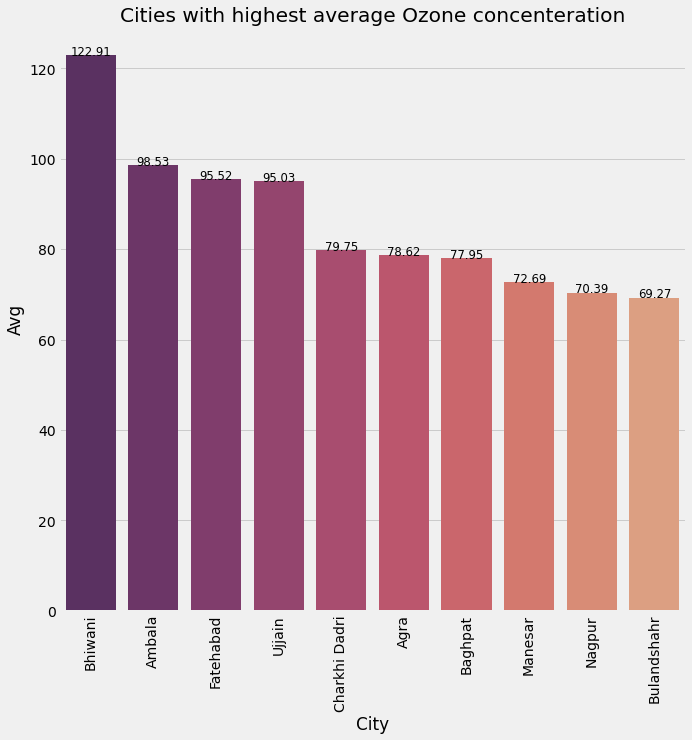

In [18]:
plt.figure(figsize=(10,10))
df_avg_top10 = df_avg.sort_values(by = 'Avg' ,ascending =False).head(10).reset_index()
pal = reversed(sns.color_palette('flare', len(df_avg_top10)))
g=sns.barplot(x='City',y='Avg',data=df_avg_top10, palette=pal)

for index, row in df_avg_top10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with highest average Ozone concenteration')
plt.xticks(rotation = 90)
plt.show()

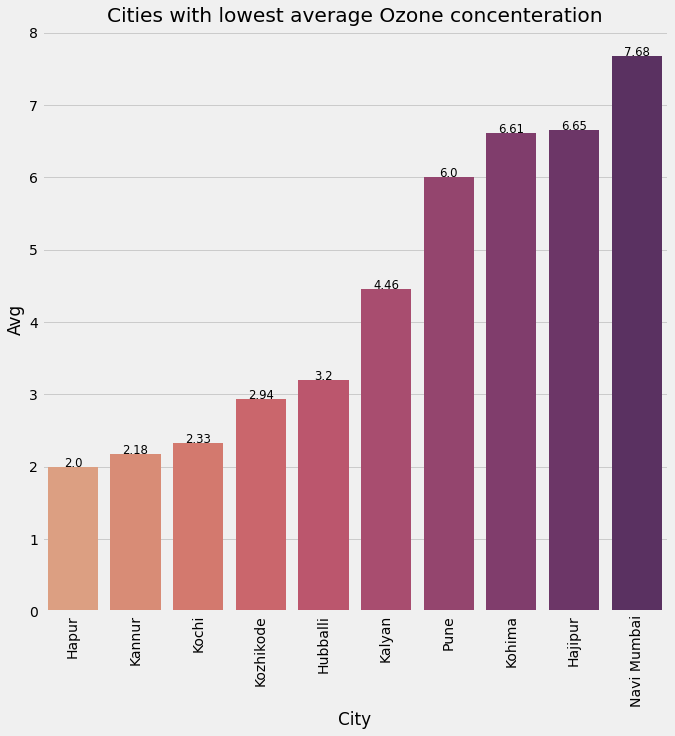

In [19]:
plt.figure(figsize=(10,10))
df_avg_last10 = df_avg.sort_values(by = 'Avg' ,ascending =False).dropna().tail(10).sort_values(by = 'Avg').reset_index()
g=sns.barplot(x='City',y='Avg',data=df_avg_last10, palette='flare')

for index, row in df_avg_last10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with lowest average Ozone concenteration')
plt.xticks(rotation = 90)
plt.show()

## Delhi

In [20]:
df_2 = df[cols].copy()
delhi = df_2.loc[df_2.City == 'Delhi'].copy()
print(delhi.shape)
delhi = delhi.reset_index(drop = True)
delhi = delhi.round(2)
delhi.head()

(300, 10)


,City,Coordinates,Time,Month,Hour,Date,Day,OZONE_min,OZONE_avg,OZONE_max
0,Delhi,"[28.6273928, 77.1716954]",2020-09-22 14:00:00,9,14,22-09-2020,1,7.94,27.00,99.23
1,Delhi,"[28.6273928, 77.1716954]",2020-09-22 16:00:00,9,16,22-09-2020,1,8.03,34.83,77.63
2,Delhi,"[28.6273928, 77.1716954]",2020-09-22 19:00:00,9,19,22-09-2020,1,8.00,38.86,64.17
3,Delhi,"[28.6273928, 77.1716954]",2020-09-22 22:00:00,9,22,22-09-2020,1,7.49,30.83,64.17
4,Delhi,"[28.6273928, 77.1716954]",2020-09-23 04:00:00,9,4,23-09-2020,2,7.26,13.12,60.50


In [21]:
delhi.describe()

,Month,Hour,Day,OZONE_min,OZONE_avg,OZONE_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,7.360133,46.947667,115.986567
std,0.370287,5.458002,1.871871,1.610747,27.765959,22.541506
min,9.000000,0.000000,0.000000,5.030000,8.440000,47.310000
25%,10.000000,9.000000,1.000000,6.117500,17.247500,105.310000
50%,10.000000,13.000000,2.000000,7.075000,49.060000,119.430000
75%,10.000000,17.000000,4.000000,8.220000,73.020000,131.890000
max,10.000000,23.000000,6.000000,14.940000,105.740000,159.520000


### Taking only the time from 7 am to 10 pm

(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='OZONE_avg'>

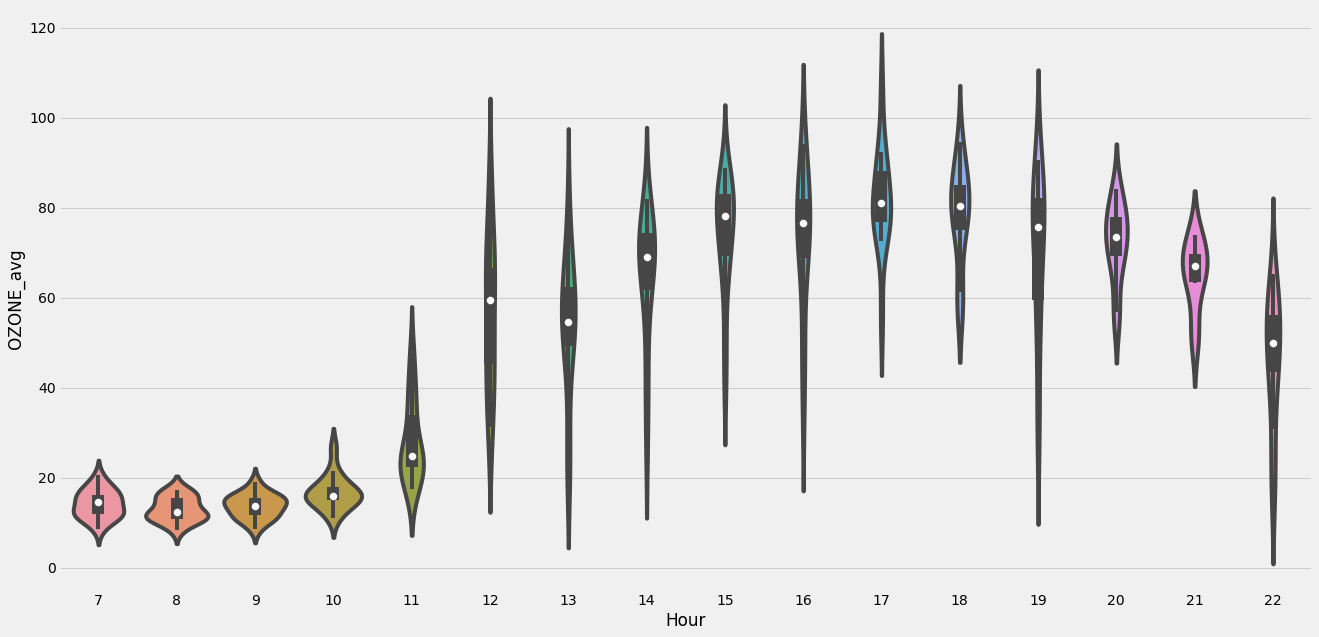

In [22]:
delhi = delhi[(delhi.Hour >= 7) & (delhi.Hour <= 22)]
print(delhi.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'OZONE_avg',x = 'Hour',data = delhi)

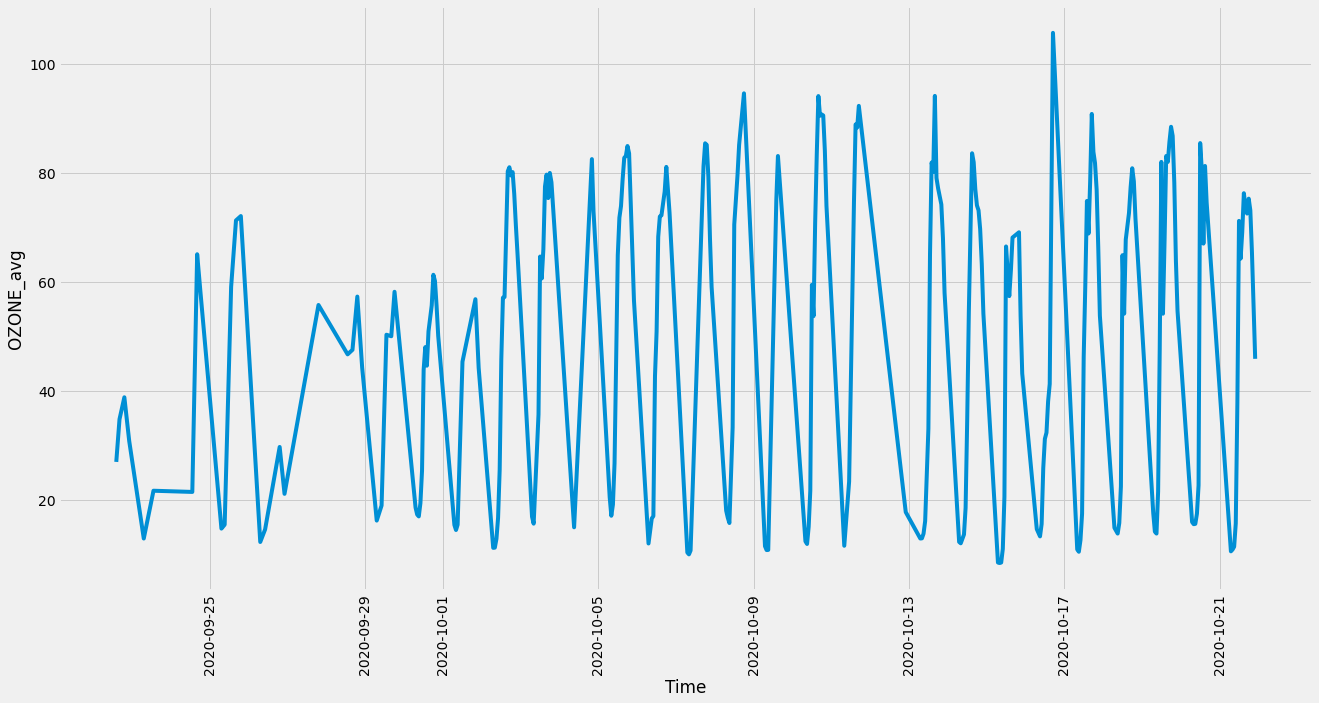

In [23]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'OZONE_avg',x = 'Time',data = delhi,)
plt.xticks(rotation = 90)
plt.show()

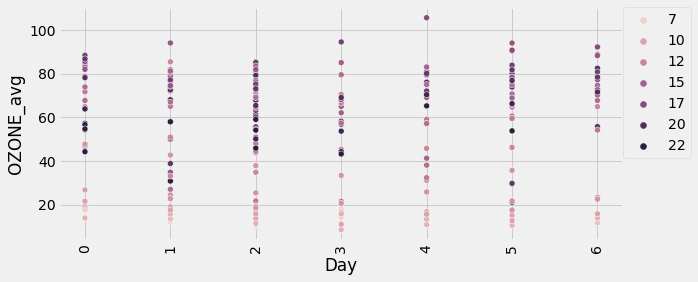

In [24]:
plt.figure(figsize = (9,4))
sns.scatterplot(y = 'OZONE_avg',x = 'Day',hue = 'Hour',data = delhi) #color = ('#41cb89')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

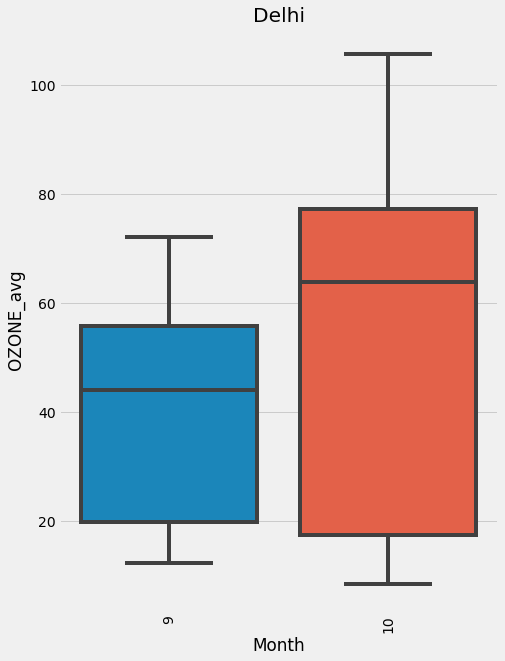

In [25]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'OZONE_avg',x = 'Month',data = delhi)
plt.title('Delhi')
plt.xticks(rotation = 90)
plt.show()

In [26]:
delhi_sep = delhi[delhi.Month == 9].copy()
delhi_oct = delhi[delhi.Month == 10].copy()

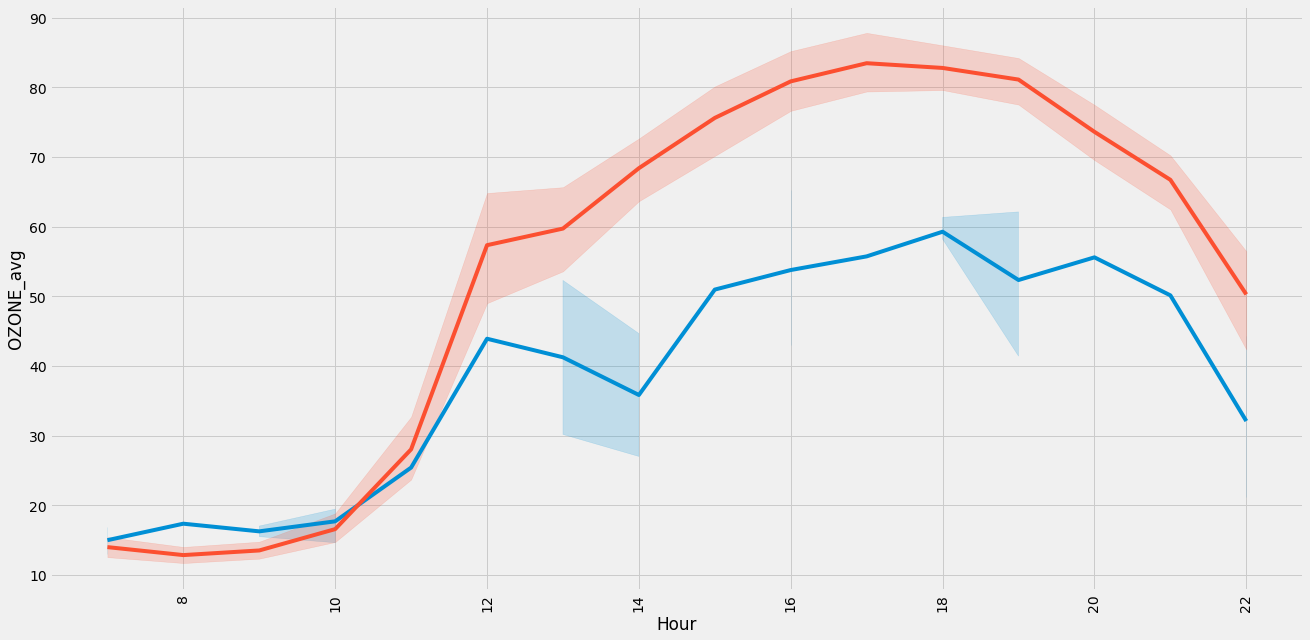

In [27]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'OZONE_avg',x = 'Hour',data = delhi_sep)
sns.lineplot(y = 'OZONE_avg',x = 'Hour',data = delhi_oct)
plt.xticks(rotation = 90)
plt.show()

## Mumbai

In [28]:
mum = df_2.loc[df_2.City == 'Mumbai'].copy()
mum = mum.reset_index(drop = True)
mum = mum.round(2)
mum.head()

,City,Coordinates,Time,Month,Hour,Date,Day,OZONE_min,OZONE_avg,OZONE_max
0,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 14:00:00,9,14,22-09-2020,1,4.00,5.00,7.22
1,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 16:00:00,9,16,22-09-2020,1,4.00,5.67,9.89
2,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 19:00:00,9,19,22-09-2020,1,4.00,7.00,10.00
3,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 22:00:00,9,22,22-09-2020,1,4.11,7.89,10.22
4,Mumbai,"[18.9387711, 72.8353355]",2020-09-23 04:00:00,9,4,23-09-2020,2,4.11,8.56,10.33


In [29]:
mum.describe()

,Month,Hour,Day,OZONE_min,OZONE_avg,OZONE_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,4.548233,9.308067,18.848767
std,0.370287,5.458002,1.871871,0.735647,3.862651,7.547651
min,9.000000,0.000000,0.000000,2.880000,3.250000,7.220000
25%,10.000000,9.000000,1.000000,4.000000,6.302500,13.405000
50%,10.000000,13.000000,2.000000,4.500000,8.630000,15.440000
75%,10.000000,17.000000,4.000000,5.000000,11.677500,23.842500
max,10.000000,23.000000,6.000000,6.780000,29.120000,44.880000


(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='OZONE_avg'>

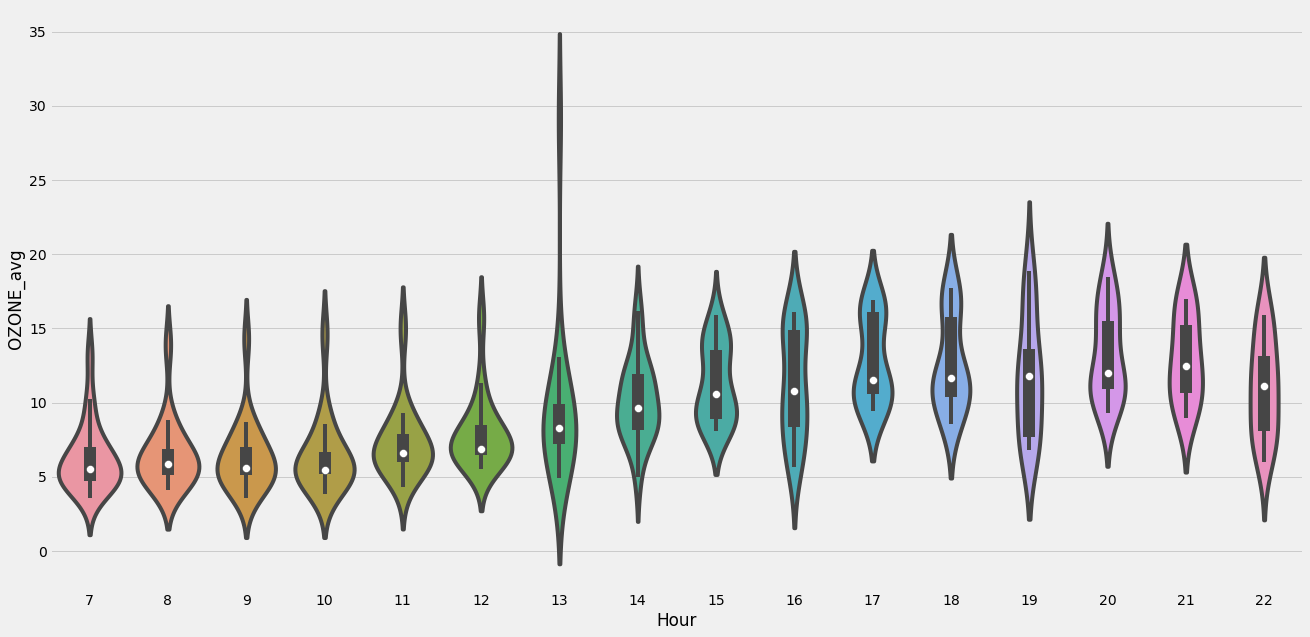

In [30]:
mum = mum[(mum.Hour >= 7) & (mum.Hour <= 22)]
print(mum.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'OZONE_avg',x = 'Hour',data = mum)

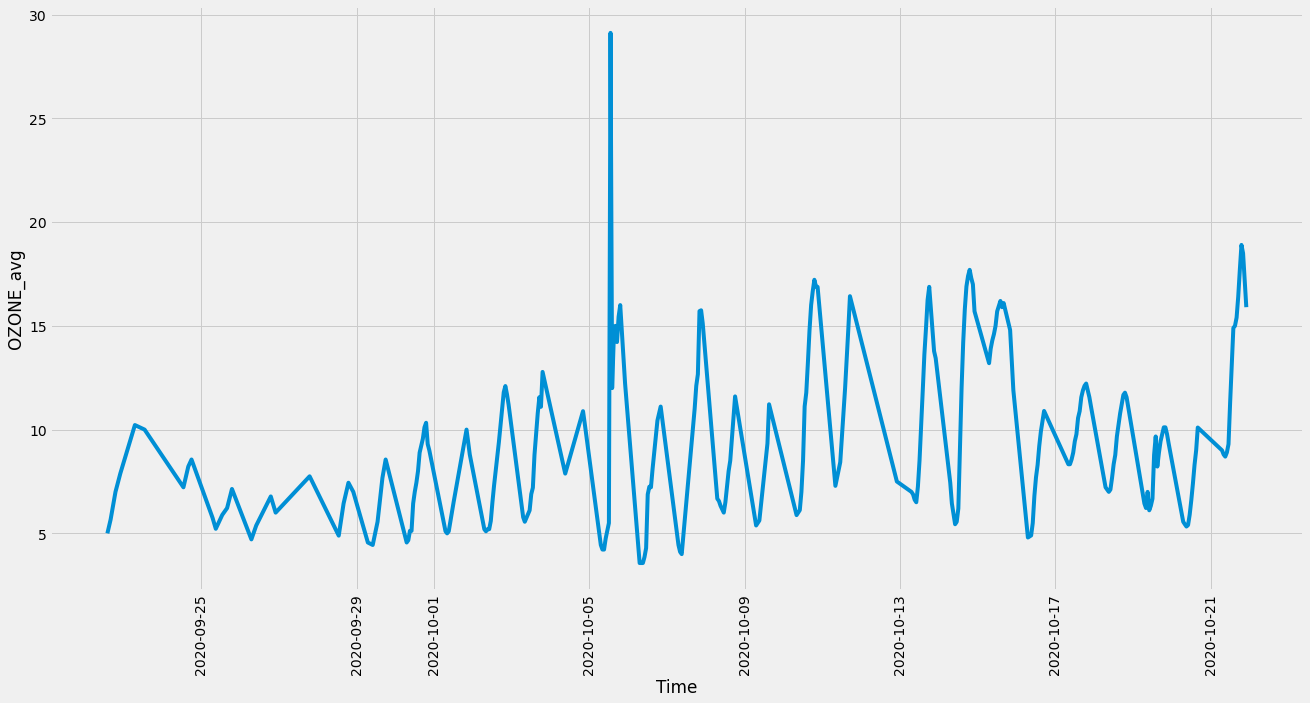

In [31]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'OZONE_avg',x = 'Time',data = mum)
plt.xticks(rotation = 90)
plt.show()

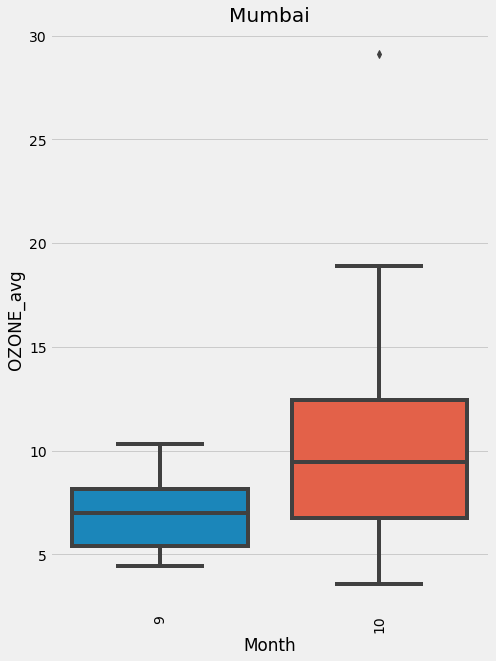

In [32]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'OZONE_avg',x = 'Month',data = mum)
plt.title('Mumbai')
plt.xticks(rotation = 90)
plt.show()

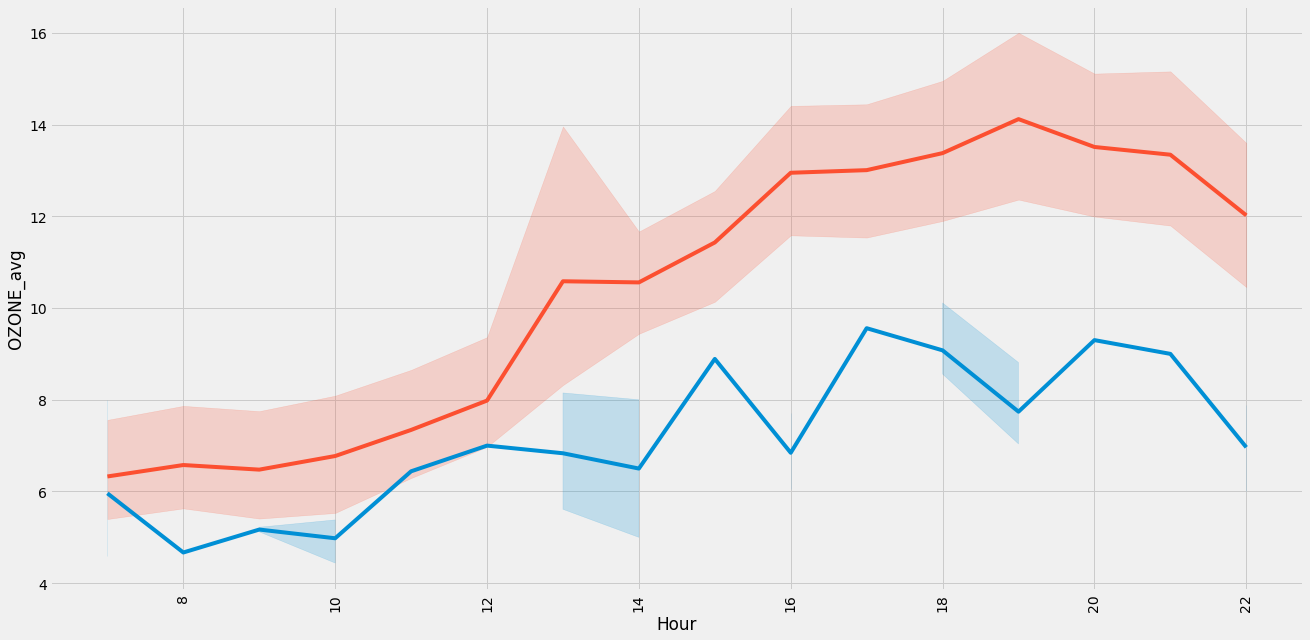

In [33]:
mum_sep = mum[mum.Month == 9].copy()
mum_oct = mum[mum.Month == 10].copy()
plt.figure(figsize = (20,10))
sns.lineplot(y = 'OZONE_avg',x = 'Hour',data = mum_sep)
sns.lineplot(y = 'OZONE_avg',x = 'Hour',data = mum_oct)
plt.xticks(rotation = 90)
plt.show()